<a href="https://colab.research.google.com/github/ashish-saha/Subject_Recognition_Using_LSTM_for_HAR_Dataset/blob/main/LSTM_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -LO "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M    0 58.1M    0     0  27.7M      0 --:--:--  0:00:02 --:--:-- 27.7M


In [2]:
!unzip human+activity+recognition+using+smartphones.zip

Archive:  human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     


In [3]:
%%capture
!unzip "UCI HAR Dataset.zip"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_iterative_imputer  # Required to enable
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
import numpy as np
import pandas as pd

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
keras.utils.set_random_seed(812)

# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [5]:
## get the data from txt files to pandas dataffame
# training data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'])

# test data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'])


<ipython-input-5-32557c65a558>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-5-32557c65a558>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [6]:
# one hot encode y
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# Assuming you want 1 time steps
time_steps = 1

# Compute the number of samples after adjusting for time steps
train_num_samples = X_train.shape[0] // time_steps
test_num_samples = X_test.shape[0] // time_steps


# Reshape the data to be in 3D (num_samples, time_steps, num_features)
X_train_reshaped = np.array(X_train).reshape((train_num_samples, time_steps, X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((test_num_samples, time_steps, X_test.shape[1]))

In [8]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(y_train.shape[1], activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         353,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,991 (1.38 MB)

 Trainable params: 361,991 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_history = model.fit(X_train_reshaped, y_train, epochs = 100, validation_split = 0.20, batch_size = 1024, verbose = 1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.2482 - loss: 1.8427 - val_accuracy: 0.4541 - val_loss: 1.3806
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4888 - loss: 1.3145 - val_accuracy: 0.7206 - val_loss: 1.0301
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6588 - loss: 1.0092 - val_accuracy: 0.8491 - val_loss: 0.7745
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7836 - loss: 0.7802 - val_accuracy: 0.8892 - val_loss: 0.5747
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8310 - loss: 0.5877 - val_accuracy: 0.9143 - val_loss: 0.4160
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8711 - loss: 0.4440 - val_accuracy: 0.9171 - val_loss: 0.3275
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8814 - loss: 0.3531 - val_accuracy: 0.9307 - val_loss: 0.2584
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8999 - loss: 0.2904 - val_accuracy: 0.9361 - val_loss

In [11]:
model.evaluate(X_test_reshaped, y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9359 - loss: 0.2153


[0.21031518280506134, 0.9385815858840942]

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


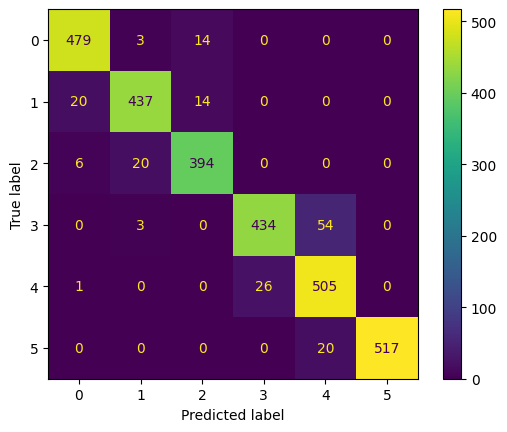

In [12]:
predictions = model.predict(X_test_reshaped)
predictions = np.argmax(predictions, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, predictions)
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm)
cm_disp.plot()
plt.show()

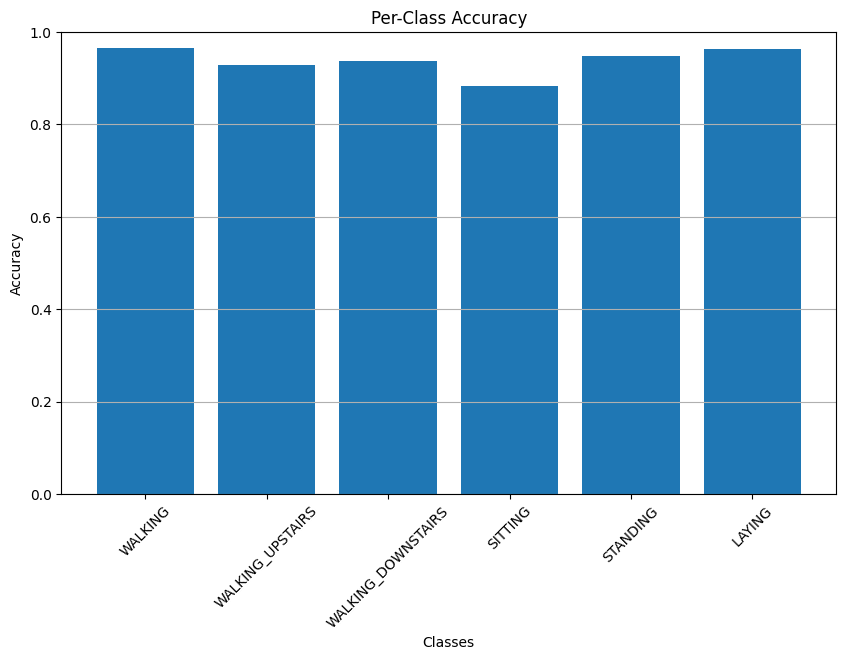

In [15]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)  # Calculate per-class accuracy
label_dict = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

# Plot per-class accuracy
classes = [label_dict[i+1] for i in range(len(class_accuracies))]
plt.figure(figsize=(10, 6))
plt.bar(classes, class_accuracies)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
# We have to do this because some of the features have duplicate names
# Original column names
original_columns = X_train.columns.tolist()

# Function to append axis labels (-X, -Y, -Z) for repeated features
def append_axis_labels(features):
    updated_features = []
    count_dict = {}  # To track the occurrence of each feature
    axes = ['-X', '-Y', '-Z']  # Axis labels

    for feature in features:
        # If the feature has been seen before, assign the next axis label
        if feature in count_dict:
            count_dict[feature] += 1
        else:
            count_dict[feature] = 0  # Initialize for first occurrence

        # Append the appropriate axis label
        axis_label = axes[count_dict[feature] % len(axes)]  # Cycle through -X, -Y, -Z
        updated_features.append(feature.replace("bandsEnergy()", f"bandsEnergy(){axis_label}"))

    return updated_features

# Update column names
updated_columns = append_axis_labels(original_columns)

# Assign updated column names to the DataFrame
X_train.columns = updated_columns
X_test.columns = updated_columns

In [18]:
def simulate_multiple_missing_intervals(df, acc_columns, gyro_columns, acc=True, gyro=True, missing_duration=4, sampling_rate=50, num_intervals=1):
    """
    Simulates multiple intervals of missing data for accelerometer or gyroscope ensuring no overlap.

    Args:
        df: DataFrame containing the dataset.
        acc_columns: List of accelerometer-specific columns.
        gyro_columns: List of gyroscope-specific columns.
        missing_duration: Duration of missing data in seconds for each interval.
        sampling_rate: Number of samples per second.
        num_intervals: Number of intervals with missing data.

    Returns:
        Modified DataFrame with missing data for accelerometer or gyroscope (but not both).
    """
    df_copy = df.copy()
    missing_samples = missing_duration * sampling_rate
    total_rows = len(df)
    used_intervals = []
    acc_start_idx = len(df)
    acc_end_idx = 0

    for _ in range(num_intervals):
        if acc:
            # Randomly select rows for accelerometer missing data
            acc_start_idx = np.random.randint(0, total_rows - missing_samples + 1)
            acc_end_idx = acc_start_idx + missing_samples

            # Ensure no overlap with previously selected intervals
            while any(start <= acc_end_idx and end >= acc_start_idx for start, end in used_intervals):
                acc_start_idx = np.random.randint(0, total_rows - missing_samples + 1)
                acc_end_idx = acc_start_idx + missing_samples

            # Mask accelerometer data
            df_copy.iloc[acc_start_idx:acc_end_idx, df.columns.get_indexer(acc_columns)] = np.nan # 0
            used_intervals.append((acc_start_idx, acc_end_idx))

        if gyro:
            # Randomly select rows for gyroscope missing data ensuring no overlap
            gyro_start_idx = np.random.randint(0, total_rows - missing_samples + 1)
            gyro_end_idx = gyro_start_idx + missing_samples

            while (any(start <= gyro_end_idx and end >= gyro_start_idx for start, end in used_intervals) or
                  (gyro_start_idx <= acc_end_idx and gyro_end_idx >= acc_start_idx)):
                gyro_start_idx = np.random.randint(0, total_rows - missing_samples + 1)
                gyro_end_idx = gyro_start_idx + missing_samples

            # Mask gyroscope data
            df_copy.iloc[gyro_start_idx:gyro_end_idx, df.columns.get_indexer(gyro_columns)] = np.nan # 0
            used_intervals.append((gyro_start_idx, gyro_end_idx))

    return df_copy, used_intervals



In [19]:
def pca_imputation(df, imputation_method='SimpleImputer', n_components=None):
    """
    Imputes missing values using PCA.

    Args:
        df: DataFrame with missing values (NaN).
        n_components: Number of principal components to retain. If None, retain all.

    Returns:
        DataFrame with imputed values.
    """
    # Step 1: Impute initial missing values with the mean

    if imputation_method=='SimpleImputer':
        imputer = SimpleImputer(strategy='mean')
        imputed_data = imputer.fit_transform(df)
    elif imputation_method=='KNNImputer':
        imputer = KNNImputer(n_neighbors=5, weights='distance')
        imputed_data = imputer.fit_transform(df)
    elif imputation_method=='IterativeImputer':
        imputer = IterativeImputer(max_iter=5, random_state=42)
        imputed_data = imputer.fit_transform(df)

    # if enable_pca:
    print ("Doing Principle Component Analysis")
    # Step 2: Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(imputed_data)

    # Step 3: Reconstruct data from principal components
    imputed_pca_data = pca.inverse_transform(principal_components)

    # Step 4: Fill back into DataFrame format
    df_imputed = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)
    df_imputed_pca = pd.DataFrame(imputed_pca_data, columns=df.columns, index=df.index)


    return df_imputed, df_imputed_pca

In [20]:
Combinations_of_data = [
    (True, True, 1, 5),
    (True, True, 5, 1),
    (True, False, 5, 2),
    (False, True, 5, 2),
    (True, False, 10, 1),
    (False, True, 10, 1)
]

In [21]:
results = []

# Example Usage
for data in Combinations_of_data:
    # Define accelerometer and gyroscope columns
    accelerometer_cols = [col for col in X_train.columns if 'Acc' in col]
    gyroscope_cols = [col for col in X_train.columns if 'Gyro' in col]

    # Simulate multiple intervals of missing data
    # X_train_modified, X_train_intervals = simulate_multiple_missing_intervals(
    #     X_train, accelerometer_cols, gyroscope_cols, num_intervals=5)
    X_test_modified, X_test_intervals = simulate_multiple_missing_intervals(
        X_test, accelerometer_cols, gyroscope_cols, acc=data[0], gyro=data[1], missing_duration=data[2], num_intervals=data[3])

    # Display the intervals with missing data
    # print("Intervals with missing data for train data (start, end):")
    # for interval in X_train_intervals:
    #     print(interval)
    print("Intervals with missing data for test data (start, end):")
    for interval in X_test_intervals:
        print(interval)

    # Step 1: Replace 0 with NaN for accelerometer and gyroscope columns
    X_test_modified_nan = X_test_modified.copy()
    for col in accelerometer_cols + gyroscope_cols:
        X_test_modified_nan[col] = X_test_modified_nan[col].replace(0, np.nan)

    # Step 2: Verify missing values
    missing_count = X_test_modified_nan.isna().sum().sum()
    print(f"Missing values after replacing 0 with NaN: {missing_count}")

    # Step 3: Apply PCA imputation
    X_test_SimpleImputer, X_test_SimpleImputer_with_PCA = pca_imputation(X_test_modified_nan, imputation_method='SimpleImputer', n_components=175)
    X_test_KNNImputer, X_test_KNNImputer_with_PCA = pca_imputation(X_test_modified_nan, imputation_method='KNNImputer', n_components=175)
    # X_test_IterativeImputer, X_test_IterativeImputer_with_PCA = pca_imputation(X_test_modified_nan, imputation_method='IterativeImputer', n_components=175)

    # Step 4: Check results
    print("Missing values before PCA imputation :", X_test_modified_nan.isna().sum().sum())

    print("Missing values after SimpleImputer:", X_test_SimpleImputer.isna().sum().sum())
    print("Missing values after KNNImputer:", X_test_KNNImputer.isna().sum().sum())
    # print("Missing values after IterativeImputer:", X_test_IterativeImputer.isna().sum().sum())

    print("Missing values after PCA SimpleImputer:", X_test_SimpleImputer_with_PCA.isna().sum().sum())
    print("Missing values after PCA KNNImputer:", X_test_KNNImputer_with_PCA.isna().sum().sum())
    # print("Missing values after PCA IterativeImputer:", X_test_IterativeImputer_with_PCA.isna().sum().sum())

    # Reshape the data to be in 3D (num_samples, time_steps, num_features)
    # X_train_modified_reshaped = np.array(X_train_modified).reshape((train_num_samples, time_steps, X_train_modified.shape[1]))
    X_test_modified_reshaped = np.array(X_test_modified).reshape((test_num_samples, time_steps, X_test_modified.shape[1]))


    # Reshape the data to be in 3D (num_samples, time_steps, num_features)
    # X_train_imputed_reshaped = np.array(X_train_imputed).reshape((train_num_samples, time_steps, X_train_imputed.shape[1]))
    X_test_SimpleImputer_reshaped = np.array(X_test_SimpleImputer).reshape((test_num_samples, time_steps, X_test_SimpleImputer.shape[1]))
    X_test_KNNImputer_reshaped = np.array(X_test_KNNImputer).reshape((test_num_samples, time_steps, X_test_KNNImputer.shape[1]))
    # X_test_IterativeImputer_reshaped = np.array(X_test_IterativeImputer).reshape((test_num_samples, time_steps, X_test_IterativeImputer.shape[1]))

    X_test_SimpleImputer_with_PCA_reshaped = np.array(X_test_SimpleImputer_with_PCA).reshape((test_num_samples, time_steps, X_test_SimpleImputer_with_PCA.shape[1]))
    X_test_KNNImputer_with_PCA_reshaped = np.array(X_test_KNNImputer_with_PCA).reshape((test_num_samples, time_steps, X_test_KNNImputer_with_PCA.shape[1]))
    # X_test_IterativeImputer_with_PCA_reshaped = np.array(X_test_IterativeImputer_with_PCA).reshape((test_num_samples, time_steps, X_test_IterativeImputer_with_PCA.shape[1]))


    results.append((
        X_test_modified_nan.isna().sum().sum(),
        model.evaluate(X_test_modified_reshaped, y_test)[1],
        model.evaluate(X_test_SimpleImputer_reshaped, y_test)[1],
        model.evaluate(X_test_KNNImputer_reshaped, y_test)[1],
        model.evaluate(X_test_SimpleImputer_with_PCA_reshaped, y_test)[1],
        model.evaluate(X_test_KNNImputer_with_PCA_reshaped, y_test)[1]
    ))


Intervals with missing data for test data (start, end):
(392, 442)
(592, 642)
(99, 149)
(950, 1000)
(672, 722)
(1830, 1880)
(750, 800)
(1384, 1434)
(2112, 2162)
(1203, 1253)
Missing values after replacing 0 with NaN: 139741
Doing Principle Component Analysis
Doing Principle Component Analysis
Missing values before PCA imputation : 139741
Missing values after SimpleImputer: 0
Missing values after KNNImputer: 0
Missing values after PCA SimpleImputer: 0
Missing values after PCA KNNImputer: 0
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: nan
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.6019
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.9627
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.6066
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.9638
Intervals with missing data for test data (start, end):
(2138, 2388)
(609, 859)
Missing values after replacing 0 with NaN: 139737
Doing Principl

In [22]:
results

[(139741,
  0.7821513414382935,
  0.8988802433013916,
  0.8859857320785522,
  0.8975229263305664,
  0.885646402835846),
 (139737,
  0.7872412800788879,
  0.8900576829910278,
  0.8931116461753845,
  0.8907363414764404,
  0.8927723169326782),
 (172691,
  0.771632194519043,
  0.8663046956062317,
  0.9233118295669556,
  0.8652867078781128,
  0.9236511588096619),
 (106749,
  0.7974210977554321,
  0.9189005494117737,
  0.9300984144210815,
  0.9185612201690674,
  0.92840176820755),
 (172718,
  0.7709535360336304,
  0.8625721335411072,
  0.913810670375824,
  0.861214816570282,
  0.913810670375824),
 (106748,
  0.7740074396133423,
  0.9307770729064941,
  0.9362063407897949,
  0.9297590851783752,
  0.9348490238189697)]

In [23]:
print ("1 second ACC & 1 Second Gyro (5 seperate intervals for each) : {}, {}, {}, {}, {}, {}".format(results[0][0], results[0][1], results[0][2], results[0][3], results[0][4], results[0][5]) )
print ("5 second ACC & 5 Second Gyro (1 continuous intervals for each) : {}, {}, {}, {}, {}, {}".format(results[1][0], results[1][1], results[1][2], results[1][3], results[1][4], results[1][5]) )
print ("5 second ACC (2 seperate intervals) : {}, {}, {}, {}, {}, {}".format(results[2][0], results[2][1], results[2][2], results[2][3], results[2][4], results[2][5]) )
print ("5 Second Gyro (2 seperate intervals) : {}, {}, {}, {}, {}, {}".format(results[3][0], results[3][1], results[3][2], results[3][3], results[3][4], results[3][5]) )
print ("10 seconds ACC (1 continuous intervals) : {}, {}, {}, {}, {}, {}".format(results[4][0], results[4][1], results[4][2], results[4][3], results[4][4], results[4][5]) )
print ("10 seconds Gyro (1 continuous intervals) : {}, {}, {}, {}, {}, {}".format(results[5][0], results[5][1], results[5][2], results[5][3], results[5][4], results[5][5]) )

1 second ACC & 1 Second Gyro (5 seperate intervals for each) : 139741, 0.7821513414382935, 0.8988802433013916, 0.8859857320785522, 0.8975229263305664, 0.885646402835846
5 second ACC & 5 Second Gyro (1 continuous intervals for each) : 139737, 0.7872412800788879, 0.8900576829910278, 0.8931116461753845, 0.8907363414764404, 0.8927723169326782
5 second ACC (2 seperate intervals) : 172691, 0.771632194519043, 0.8663046956062317, 0.9233118295669556, 0.8652867078781128, 0.9236511588096619
5 Second Gyro (2 seperate intervals) : 106749, 0.7974210977554321, 0.9189005494117737, 0.9300984144210815, 0.9185612201690674, 0.92840176820755
10 seconds ACC (1 continuous intervals) : 172718, 0.7709535360336304, 0.8625721335411072, 0.913810670375824, 0.861214816570282, 0.913810670375824
10 seconds Gyro (1 continuous intervals) : 106748, 0.7740074396133423, 0.9307770729064941, 0.9362063407897949, 0.9297590851783752, 0.9348490238189697


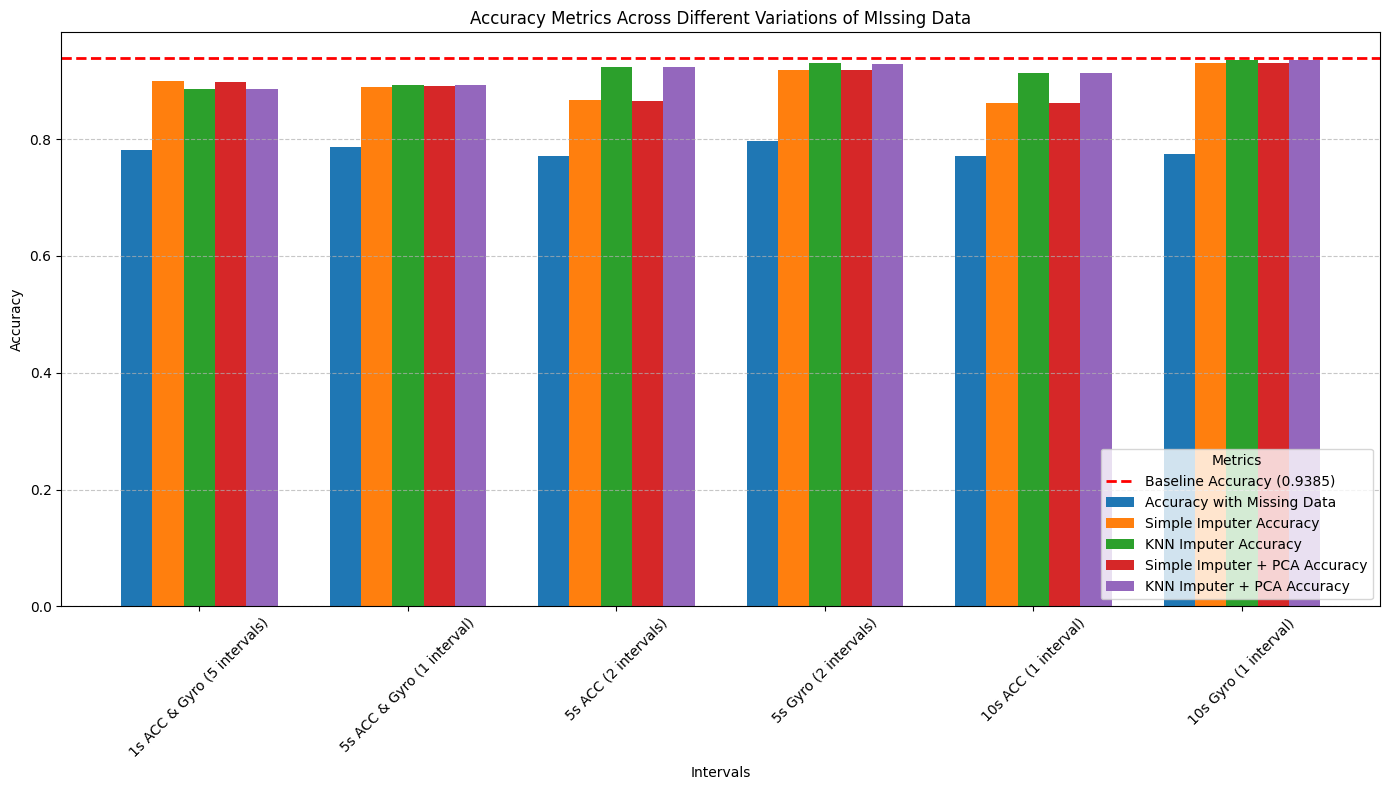

In [29]:
labels = [
    "1s ACC & Gyro (5 intervals)",
    "5s ACC & Gyro (1 interval)",
    "5s ACC (2 intervals)",
    "5s Gyro (2 intervals)",
    "10s ACC (1 interval)",
    "10s Gyro (1 interval)"
]

metric_labels = [
    "Accuracy with Missing Data",
    "Simple Imputer Accuracy",
    "KNN Imputer Accuracy",
    "Simple Imputer + PCA Accuracy",
    "KNN Imputer + PCA Accuracy"
]

# Extract data for plotting
metrics = np.array([item[1:] for item in results]).T  # Transpose for easier plotting
x = np.arange(len(labels))  # X-axis positions

# Plot a bar graph for each metric
bar_width = 0.15
plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, metric, width=bar_width, label=metric_labels[i])

# Add baseline accuracy as a horizontal line
baseline_accuracy = 0.9385
plt.axhline(y=baseline_accuracy, color='red', linestyle='--', linewidth=2, label=f'Baseline Accuracy ({baseline_accuracy})')

# Add labels, titles, and legend
plt.xticks(x + bar_width * (len(metrics) - 1) / 2, labels, rotation=45)
plt.xlabel("Intervals")
plt.ylabel("Accuracy")
plt.title("Accuracy Metrics Across Different Variations of MIssing Data")
plt.legend(title="Metrics", loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()